In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")
my_palette = "Set3"
my_palette2 = "Set2"
# import training dataset
df_train = pd.read_csv('../data/airline_train.csv').drop(columns = ['Unnamed: 0'])

In [2]:
def colour(val): 
    colour = "red" if val >0 else "black"
    return "color: %s" % colour 

In [3]:
def pivot_satisfaction (train, target, highlight = True): 
    
    df_pivot = pd.pivot_table(
        train[["id", target, "satisfaction"]],
        index = [target], 
        columns = ["satisfaction"], 
        aggfunc = "count", 
        fill_value =0).reset_index()
    
    df_pivot.columns = [target, "neutral or dissatisfied", "satisfied"]
    
    df_pivot["total"] = df_pivot["satisfied"]+df_pivot["neutral or dissatisfied"]
    df_pivot["dissatisfied_rate"] = (df_pivot["neutral or dissatisfied"]/df_pivot["total"]).mul(100).round(1).astype(str) + '%'
    
    # this is added as the colour highlight does not work on some tables due to additional calcuations that are required.
    if highlight == True: 
        df_pivot = df_pivot.style.highlight_max(subset = "dissatisfied_rate", color = "lightgreen" )
    else: 
        df_pivot = df_pivot
        
    return df_pivot

In [4]:
def count_plot(col_name, show=False):
    plt.figure(figsize = (5, 3))
    ax = sns.countplot(x =col_name, data = df_train, hue ="satisfaction" ,palette =my_palette)

    plt.title("Satisfaction by "+col_name)
    sns.despine(top = True, right = True, left = False, bottom = False)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    
    if show == True:
        plt.show()

In [5]:
metrics = ['Inflight wifi service','Departure/Arrival time convenient', 
                              'Ease of Online booking','Gate location', 'Food and drink', 
                              'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service',
                              'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']
total_scores = df_train[metrics]

# calculate sum of scores
df_train["Total_score"] = total_scores.sum(axis = 1)

# find max possible score 
max_score = len(total_scores.columns)*5
df_train["Total_score_percent"] = round((df_train["Total_score"]/max_score)*100,1)

## 1. Data Quick Look
The whole training dataset contains 24 columns and 103904 rows. This is overall a very clean dataset, and there are only 310 missing values in the column *Arrival Delay in Minutes*.

In [6]:
df_train.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total_score,Total_score_percent
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,3,4,4,5,5,25,18.0,neutral or dissatisfied,54,77.1
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,5,3,1,4,1,1,6.0,neutral or dissatisfied,32,45.7
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,3,4,4,4,5,0,0.0,satisfied,52,74.3
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,5,3,1,4,2,11,9.0,neutral or dissatisfied,42,60.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,4,4,3,3,3,0,0.0,satisfied,49,70.0


In [7]:
'''
profile = df_train.profile_report(
    title="Report without correlations",
    correlations=None,
)
profile.to_file("../data/airline_train_profile.html")
'''

'\nprofile = df_train.profile_report(\n    title="Report without correlations",\n    correlations=None,\n)\nprofile.to_file("../data/airline_train_profile.html")\n'

In [8]:
# Data Type and Null Values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [9]:
# Check Missing Values
df_train.isnull().sum().reset_index(name = "Null count").set_index("index").style.applymap(colour)

,Null count
index,
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [10]:
df_train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Total_score,Total_score_percent
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.00000,103904.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,...,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,45.37014,64.814394
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,...,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,9.26560,13.236677
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.00000,21.400000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,39.00000,55.700000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,46.00000,65.700000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,52.00000,74.300000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,70.00000,100.000000


## 2. EDA - Satisfaction
There are more neutral or dissatisfied customer feedbacks than satisfied feedbacks, this might be due to the aggregation of neutral and dissatisfied feedbacks. 

In [11]:
df_train['satisfaction'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

neutral or dissatisfied    56.7%
satisfied                  43.3%
Name: satisfaction, dtype: object

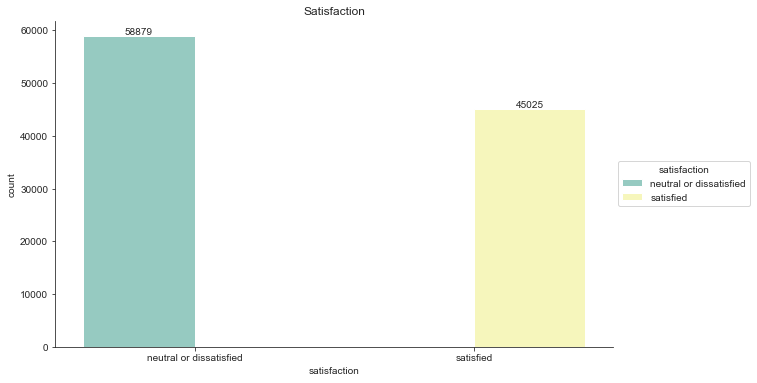

In [12]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x ="satisfaction", data = df_train, hue ="satisfaction", palette =my_palette)

sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Satisfaction")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

## 3. EDA - Gender
The levels of satisfaction are almost the same across different gender groups

In [13]:
pivot_satisfaction(df_train,"Gender")

,Gender,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Female,30193,22534,52727,57.3%
1,Male,28686,22491,51177,56.1%


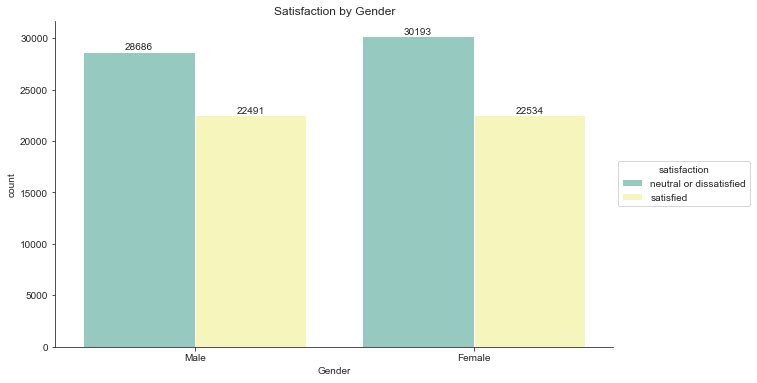

In [14]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x ="Gender", data = df_train, hue ="satisfaction", palette =my_palette)

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Satisfaction by Gender")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

## 4. EDA - Customer Type
There are way more feedbacks from loyal customers than from disloyal customers. This might be caused by a lower attention to the feedback reminder emails of disloyal customers. Also, loyal customers tend to care more about their experience, and hope to let the airlines know what they like and what they do not. </br>
Loyal customers tend to have higher rate of being satisfied than disloyal customers. One of the reasons can be the additional services they received from being a loyal customer.

In [15]:
pivot_satisfaction(df_train,"Customer Type")

,Customer Type,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Loyal Customer,44390,40533,84923,52.3%
1,disloyal Customer,14489,4492,18981,76.3%


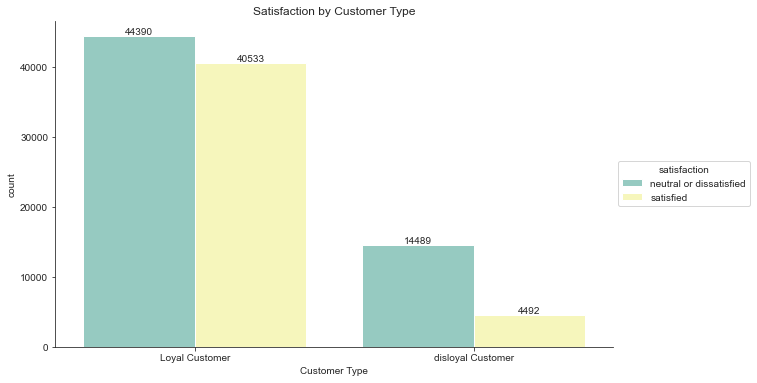

In [16]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x ="Customer Type", data = df_train, hue ="satisfaction" ,palette =my_palette)

plt.title("Satisfaction by Customer Type")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

## 5. EDA - Age
It is much harder to receive good feedback from teenagers than from elders. Probably teenagers and younger people care more about the in-plane experience. This might imply that some ameliorations on facilities that younger people might like can improve the overall satisfaction rate.

In [17]:
df_age = df_train.copy()
df_age['Age_Group'] = df_age['Age'].apply(lambda x: '50+' if x>50 
                                          else ('18-50' if x<=50 and x>=18 
                                                else 'under 18'))
pivot_satisfaction(df_age,"Age_Group")

,Age_Group,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,18-50,37904,31324,69228,54.8%
1,50+,14344,12401,26745,53.6%
2,under 18,6631,1300,7931,83.6%


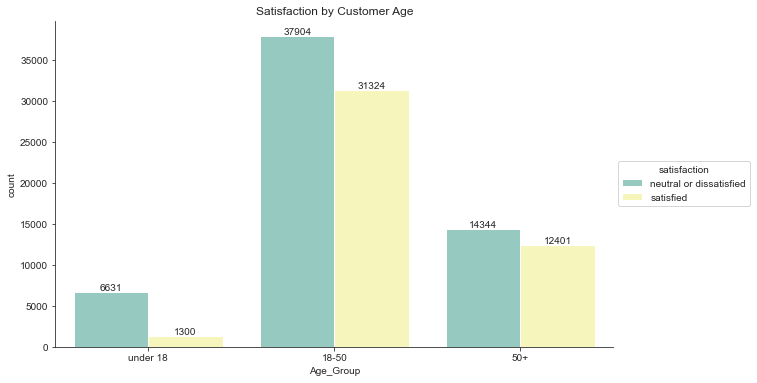

In [18]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x ="Age_Group", data = df_age, hue ="satisfaction" ,palette =my_palette)

plt.title("Satisfaction by Customer Age")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

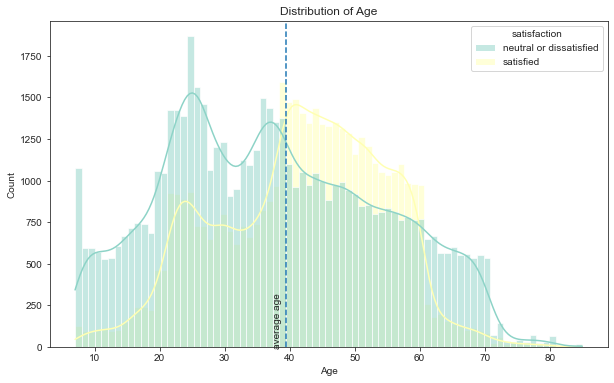

In [19]:
plt.figure(figsize = (10, 6))
sns.histplot( x= "Age", data = df_train, kde= True, hue ="satisfaction", palette =my_palette)

plt.axvline(df_train["Age"].mean(),ls = "--")
plt.text(df_train["Age"].mean()-2,0,'average age',rotation=90)

plt.title("Distribution of Age")
plt.show()

## 6. Type of Travel
Passengers are more often to express unsatisfaction for a personal travel than business travel. Some guesses of the reasons can be that business travellers sit in the business class more often, where the service is usually better.

In [20]:
pivot_satisfaction(df_train,"Type of Travel")

,Type of Travel,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Business travel,29909,41746,71655,41.7%
1,Personal Travel,28970,3279,32249,89.8%


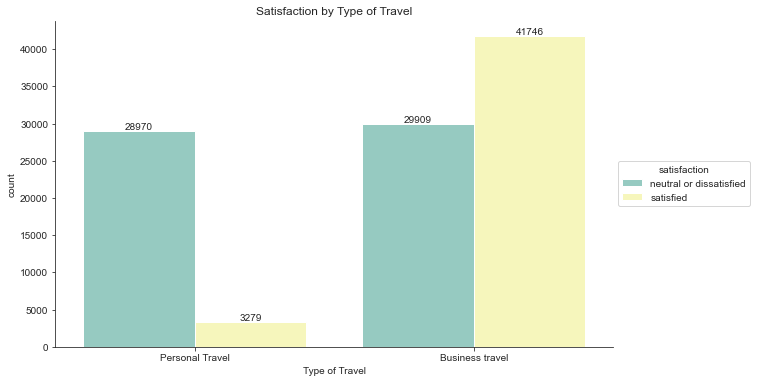

In [21]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x ="Type of Travel", data = df_train, hue ="satisfaction" ,palette =my_palette)

plt.title("Satisfaction by Type of Travel")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

In [22]:
df_train[['Type of Travel', 'Flight Distance']].groupby('Type of Travel').mean()

,Flight Distance
Type of Travel,
Business travel,1368.287237
Personal Travel,792.081057


In [23]:
df_train[['Type of Travel', 'Class', 'id']].groupby(['Type of Travel', 'Class']).count()

id
Type of Travel  Class          
Business travel Business  47508
                Eco       20257
                Eco Plus   3890
Personal Travel Business   2157
                Eco       26488
                Eco Plus   3604

In [24]:
#df_type = df_train[metrics+['Type of Travel']].groupby(['Type of Travel']).mean()
#df_type = df_type.reset_index()
#df_type = pd.melt(df_type, id_vars='Type of Travel', value_vars=metrics).rename(columns = {'variable': 'Metric', 'value': 'Score'})
#df_type

## 7. EDA - Classes
The following plots show that Business Class has way lower dissatisfied rate while the Eco class has the highest dissatisfied rate among the three. </br>
Combining with the assumption in section 6, since Most of the business travel histories are in the business class, the satisfaction rate of business travel is higher than of personal travel. 

In [25]:
pivot_satisfaction(df_train,"Class")

,Class,neutral or dissatisfied,satisfied,total,dissatisfied_rate
0,Business,15185,34480,49665,30.6%
1,Eco,38044,8701,46745,81.4%
2,Eco Plus,5650,1844,7494,75.4%


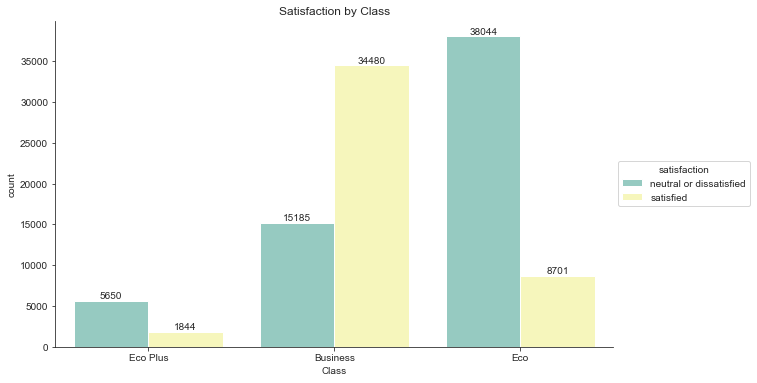

In [26]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x ="Class", data = df_train, hue ="satisfaction" ,palette =my_palette)

plt.title("Satisfaction by Class")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

## 8. EDA - Flying Distance
We can see from this density plot that the dissatisfied and satisfied ratio changes dramatically around the point where the flight distance is about 1500 km. Before that, more people gave neutural or dissatisfied feedbacks than positive feedbacks; once the travel distance goes beyond 1500km, more people started to be satisfied.

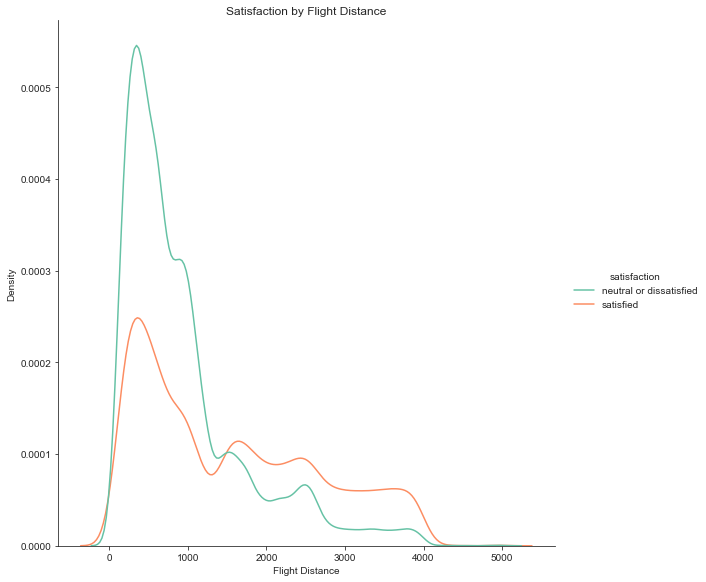

In [27]:
ax = sns.displot(x = "Flight Distance", data = df_train, hue ="satisfaction", height = 8,palette = my_palette2, kind="kde")
plt.title("Satisfaction by Flight Distance")

plt.show()

## 9.  EDA - Metrics
The distribution of the total score is relatively normalized. And it is trivial that the distribution of total scores given by satisfied passengers is right shifted comparing to that given by the rest.

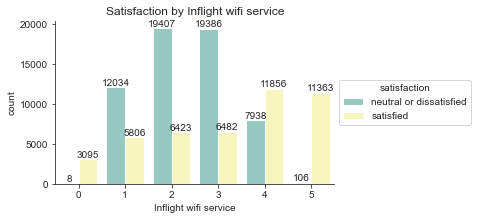

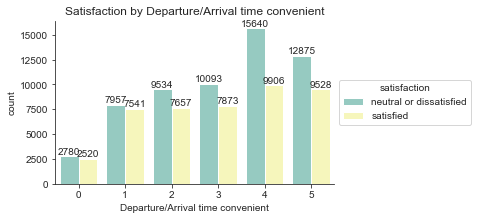

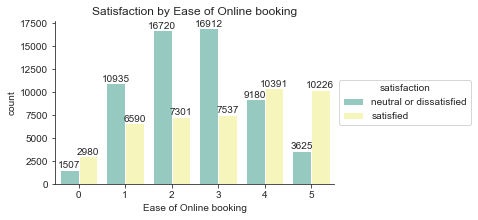

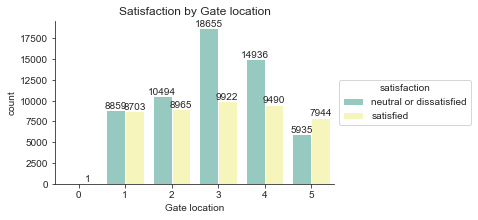

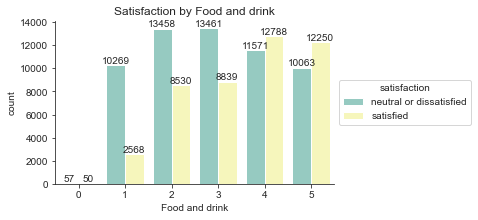

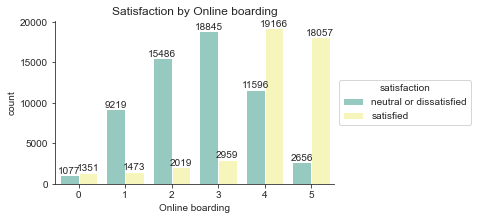

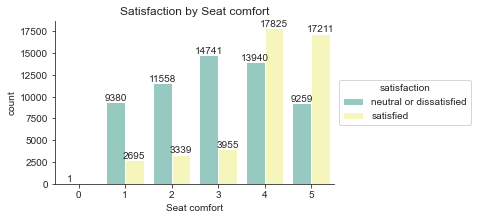

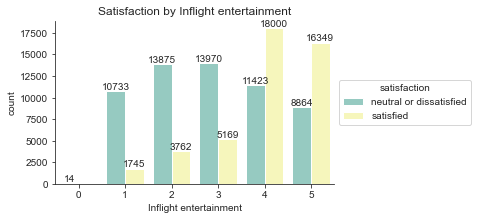

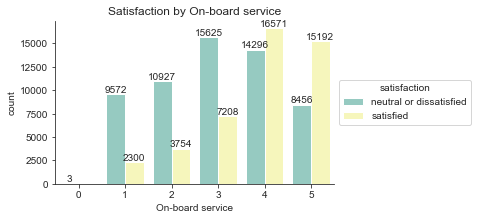

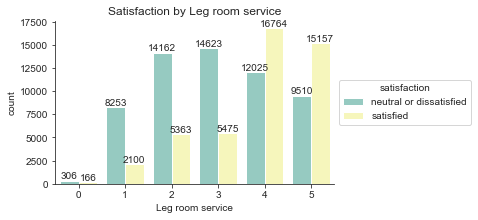

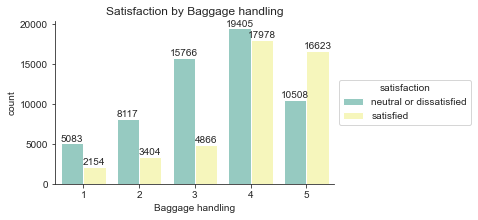

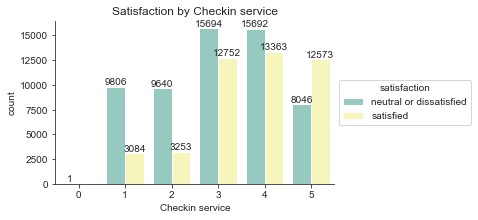

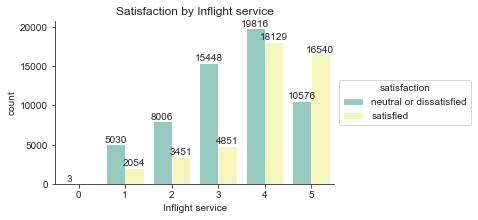

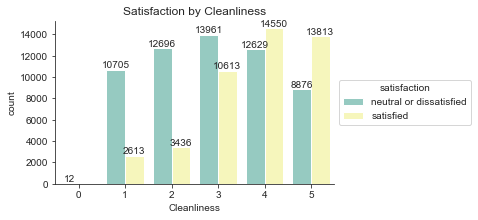

In [28]:
for i in metrics:
    count_plot(i)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")
plt.show()

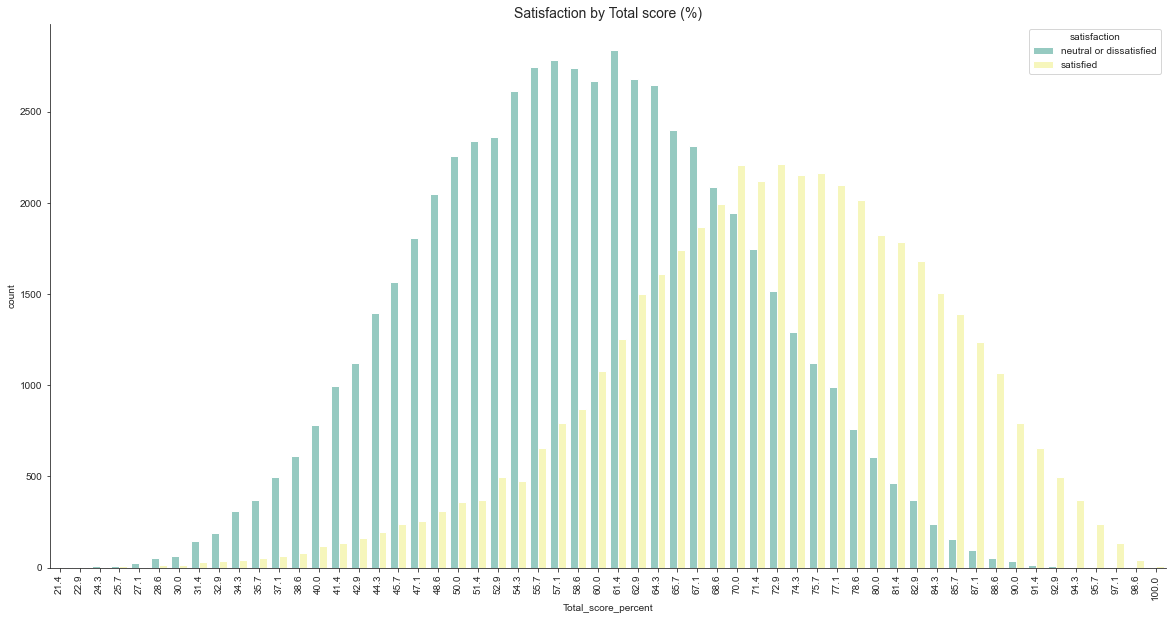

In [29]:
plt.figure(figsize = (20,10))
sns.countplot(x ="Total_score_percent", data = df_train, hue ="satisfaction",palette = my_palette)

# format graph
plt.title("Satisfaction by Total score (%)", fontsize = 14)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.xticks(rotation=90)
plt.legend(loc='upper right', title = "satisfaction")
plt.show()

## 10. EDA - Departure Delay in Minutes and Arrival Delay in Minutes
It is often assumes that the departure and arrival delay are highly correlated. The following plot shows that this assumption is valid.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


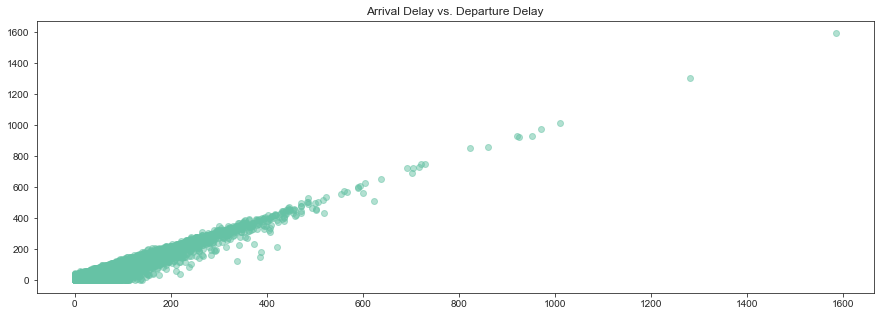

In [30]:
plt.figure(figsize = (15,5))
plt.title("Arrival Delay vs. Departure Delay")
plt.scatter(df_train['Arrival Delay in Minutes'], df_train['Departure Delay in Minutes'], alpha = 0.5, c = sns.color_palette("Set2")[0])

## 11. Correlation Plot

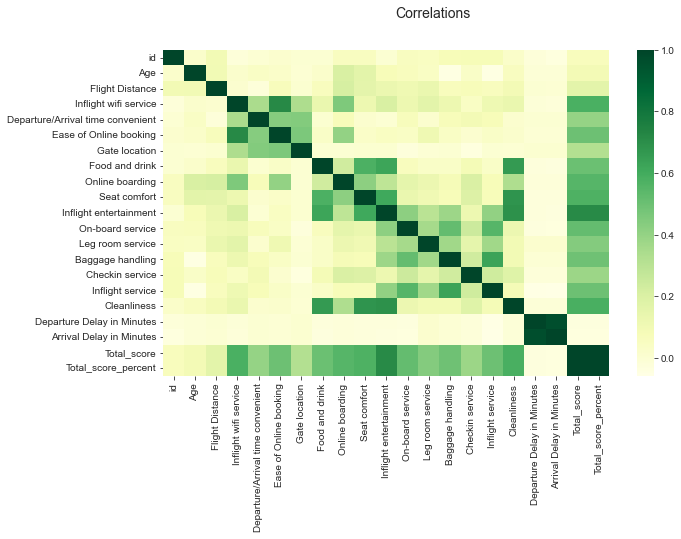

In [31]:
plt.figure(figsize = (10,6))
sns.heatmap(df_train.corr(), cmap='YlGn')

plt.suptitle("Correlations", fontsize = 14,)
plt.show()